# <code style="background:#6c89cc; color:black">Load the Libraries</code>

In [91]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
# from flask import Flask, request, render_template
import joblib

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing

import numpy as np
import seaborn as sns

from matplotlib.pylab import seed

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer



# <code style="background:#6c89cc; color:black">Load the Dataset</code>

In [92]:
df = pd.read_csv("../Datasets/stroke_data.csv")

In [93]:
df.shape

(40910, 11)

# <code style="background:#6c89cc; color:black">Feature Engineering</code>

In [94]:
df = df.dropna()

In [95]:
#Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <code style="background:#6c89cc; color:black">Creating Models</code>

In [96]:
df = df.drop(['stroke'], axis=1)

In [97]:
#Assessing for missing values
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [98]:
X = df[['sex', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].values

In [100]:
def k_mean_distance(data, centroids, cluster_labels):
  full_distances = []
  for i_centroid in range(0, max(cluster_labels) + 1):
    cx = centroids[i_centroid, 0]
    cy = centroids[i_centroid, 1]
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    full_distances.extend(distances)
  return np.mean(full_distances)

In [101]:
# TODO: Generate a synthetic dataset with five clusters
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.8, n_features=2, random_state=42)  # <-- Fill in the correct values

In [ ]:
# TODO: Fit the StandardScaler to the dataset
scaler = StandardScaler().fit(X)  # <-- Fill in the correct method and dataset

# TODO: Transform the dataset using the fitted scaler
X_std = scaler.transform(X)  # <-- Fill in the correct method and dataset

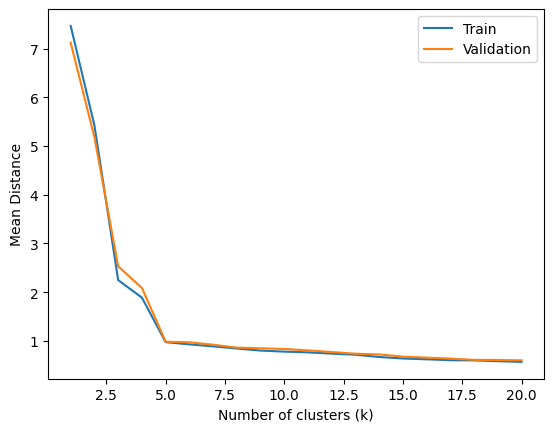

In [105]:
# TODO: Split the dataset into training and validation sets
X_train, X_valid, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)  # <-- Fill in the correct values

# Initialize lists to store loss values
loss_train, loss_valid = [], []
max_cluster = 20  # Maximum number of clusters to test

# TODO: Iterate over different values of k (number of clusters)
for k in np.arange(max_cluster) + 1:
    # TODO: Train K-Means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)  # <-- Fill in the correct values

    # Retrieve cluster centroids and predict cluster labels
    centroids = kmeans.cluster_centers_
    cluster_labels = kmeans.predict(X_train)

    # TODO: Compute and store training loss
    loss_train.append(k_mean_distance(X_train, centroids, cluster_labels))  # <-- Fill in the correct function parameters

    # TODO: Compute and store validation loss
    cluster_labels = kmeans.predict(X_valid)
    loss_valid.append(k_mean_distance(X_valid, centroids, cluster_labels))  # <-- Fill in the correct function parameters

# TODO: Plot the loss curves for training and validation
plt.plot(np.arange(max_cluster) + 1, loss_train, label='Train')
plt.plot(np.arange(max_cluster) + 1, loss_valid, label='Validation')

# TODO: Label the axes
plt.xlabel('Number of clusters (k)')  # <-- Fill in the correct label
plt.ylabel('Mean Distance')

# TODO: Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.show()

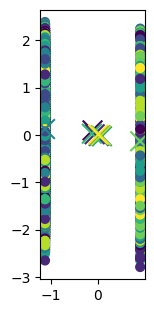

In [109]:
# TODO: Train K-Means with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=42, n_init="auto").fit(X_std)  # <-- Fill in the correct values

# TODO: Retrieve the cluster centroids
centroids = kmeans.cluster_centers_  # <-- Fill in the correct attribute

# TODO: Get the predicted cluster labels
y_pred = kmeans.labels_  # <-- Fill in the correct attribute

# TODO: Create a figure and axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the clustered data points
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred, s=40)  # <-- Fill in the correct color mapping

# TODO: Plot the cluster center locations
plt.scatter(centroids[:, 0], centroids[:, 1], c=range(10), s=200, marker="x")  # <-- Fill in the correct values

# TODO: Ensure equal aspect ratio
ax.set_aspect('equal')

# Display the plot
plt.show()

In [107]:
# TODO: Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(X_std)  # <-- Fill in the correct values

# TODO: Retrieve the predicted cluster labels
y_pred = db.labels_  # <-- Fill in the correct attribute

# TODO: Compute the number of clusters (excluding noise)
n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)  # <-- Fill in the correct variable

# TODO: Compute the number of noise points
n_noise_ = list(y_pred).count(-1)  # <-- Fill in the correct variable

# TODO: Print the results
print("Estimated number of clusters: %d" % n_clusters_)  # <-- Fill in the correct variable
print("Estimated number of noise points: %d" % n_noise_)  # <-- Fill in the correct variable

Estimated number of clusters: 358
Estimated number of noise points: 3778


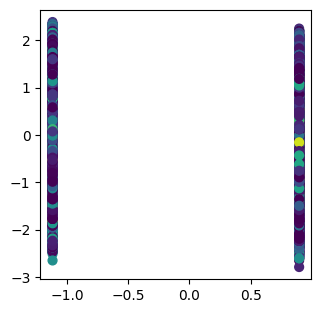

In [108]:
# TODO: Create a figure and grab the axis handle
fig = plt.figure(figsize=(3.5, 3.5))
ax = plt.gca()

# TODO: Plot the dataset with color-coded cluster labels
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_pred, s=40)  # <-- Fill in the correct variables

# TODO: Display the plot
plt.show()